In [45]:
#Social_Network_Ads.csv

**Importing the libraries**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [47]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [48]:
df.drop("User ID",axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [49]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'EstimatedSalary']].values 
y = df["Purchased"].values 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Feature Scaling**

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[-0.84252154,  0.1301563 ],
       [ 0.04175763,  0.2777019 ],
       [ 0.72953032, -1.31579061],
       [ 1.61380949,  1.10395728],
       [ 0.82778356, -1.40431797],
       [-1.43204099, -1.25677236],
       [-0.05649561,  0.1301563 ],
       [ 0.43477059, -0.16493491],
       [-0.2530021 ,  0.01211982],
       [ 1.31904976,  2.22530386],
       [ 0.14001087,  0.74984783],
       [-1.33378775,  0.54328399],
       [ 2.00682245,  0.72033871],
       [-1.23553451, -1.43382709],
       [ 0.33651735, -0.34198963],
       [-0.94077478,  0.54328399],
       [ 0.43477059,  0.2777019 ],
       [ 0.43477059,  1.10395728],
       [ 0.82778356,  0.74984783],
       [ 0.9260368 ,  1.25150288],
       [-0.44950858, -1.25677236],
       [-1.82505395, -1.34529973],
       [ 1.12254328,  0.54328399],
       [-0.64601506, -1.64039093],
       [-0.7442683 ,  0.24819278],
       [ 1.02429004,  2.07775825],
       [-0.54776182,  1.36953936],
       [-0.05649561,  0.01211982],
       [-1.9233072 ,

**Fitting Random Forest to the Training set**

In [51]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Predicting the Test set results**

In [52]:
y_pred = RF.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

**Making the Confusion Matrix**

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

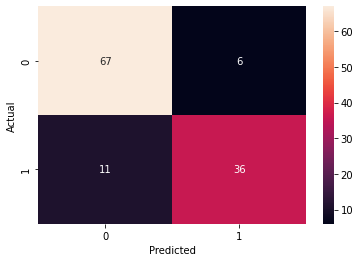

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Visualising the Training set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


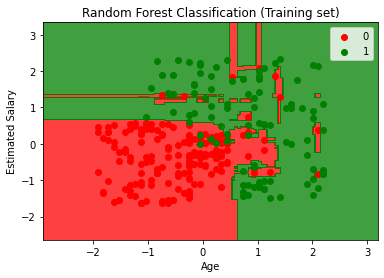

In [54]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, RF.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


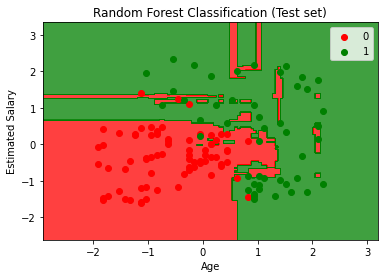

In [55]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, RF.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()